In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [2]:
df.head()
#df.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
null_values = df.isnull().sum()
null_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df = df.drop('Cabin', axis=1)
df = df.drop('Name', axis=1)
df = df.drop('Ticket', axis=1)


imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [5]:
df = df.dropna(subset=['Embarked'])
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [6]:
encoder = BinaryEncoder(cols=['Embarked'], return_df=True)
df = encoder.fit_transform(df)
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1
0,1,0,3,male,22.0,1,0,7.2500,0,1
1,2,1,1,female,38.0,1,0,71.2833,1,0
2,3,1,3,female,26.0,0,0,7.9250,0,1
3,4,1,1,female,35.0,1,0,53.1000,0,1
4,5,0,3,male,35.0,0,0,8.0500,0,1


In [7]:
df['Sex'].unique()
df['Sex'] = (df['Sex'] == "male").astype(int)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0,1
887,888,1,1,0,19.0,0,0,30.0000,0,1
888,889,0,3,0,28.0,1,2,23.4500,0,1
889,890,1,1,1,26.0,0,0,30.0000,1,0


Decision Tree

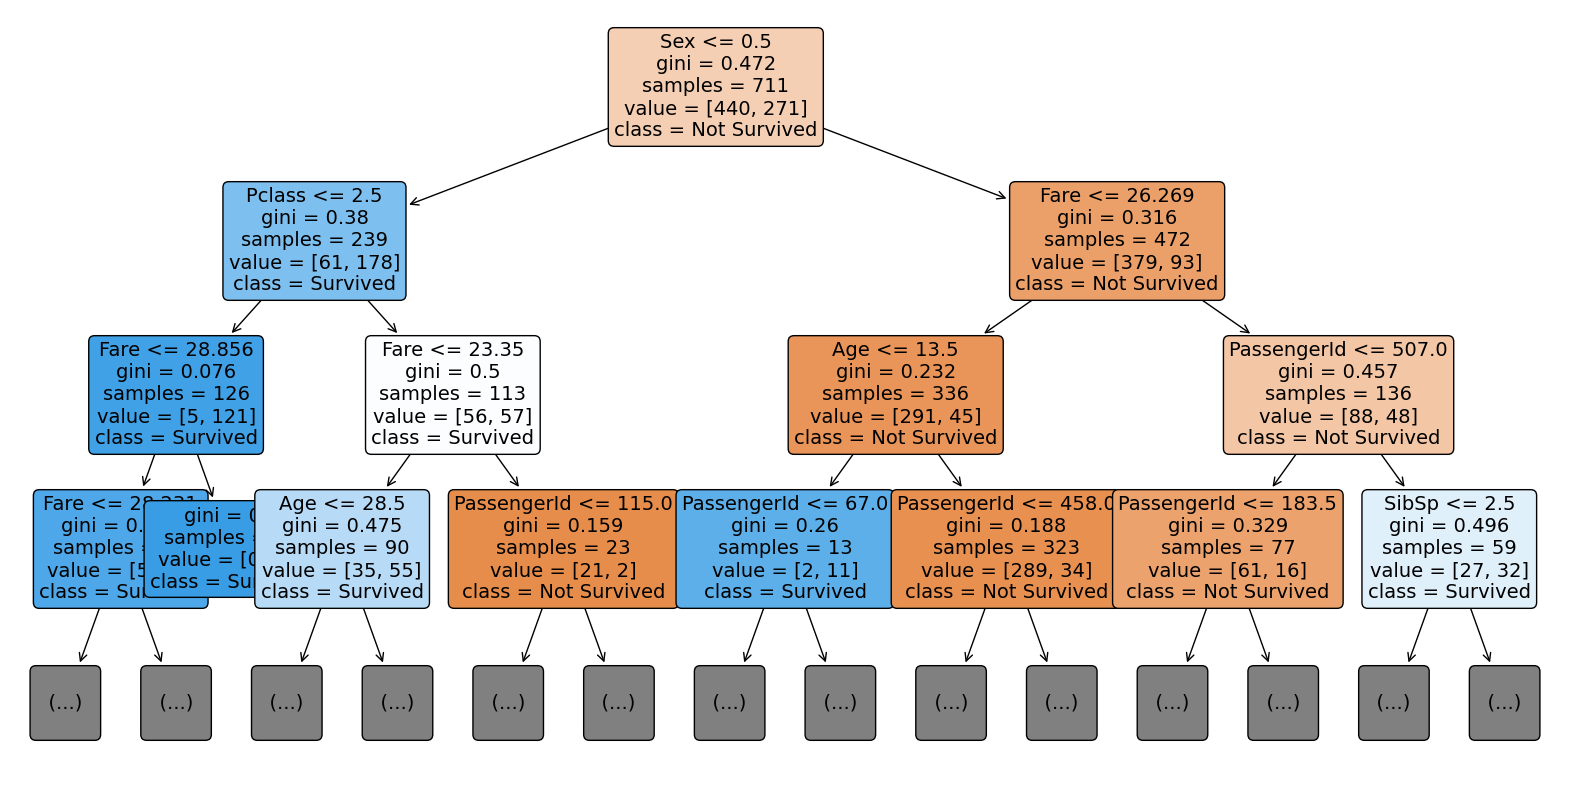

In [8]:
X = df.drop('Survived', axis=1)
y = df['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

# Visualizing
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True, fontsize=14, max_depth=3)
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_dt_classifier = grid_search.best_estimator_

cv_scores = cross_val_score(best_dt_classifier, X, y, cv=5, scoring='accuracy')
average_accuracy = cv_scores.mean()
average_accuracy

0.7829492795023171

Random Forest

In [10]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 5, 10],       
    'min_samples_split': [2, 5, 10],     
    'min_samples_leaf': [1, 2],       
    'criterion': ['gini', 'entropy']  
}

grid_search_rf = GridSearchCV(rf, 
                              param_grid_rf, 
                              cv=5, 
                              scoring='accuracy')

grid_search_rf.fit(X_train, y_train)
best_rf_classifier = grid_search_rf.best_estimator_
cv_scores_rf = cross_val_score(best_rf_classifier, X, y, cv=5, scoring='accuracy')
average_accuracy_rf = cv_scores_rf.mean()
average_accuracy_rf

0.8133117501428299